# Lending Club Case Study Analysis

## Problem Statement:
### The objective of this case study is to analyze risky loan applicants from the given data set using EDA


### Project group: Balaji S and Raghavendra R
### Group ID: 74992


In [1]:
# import required libraries

import pandas as pd     #Import Pandas 
import numpy as np      #Import numpy
import matplotlib.pyplot as plt #Import matplotlib for plots
import seaborn as sns    #import seaborn for plots
import warnings           #import warnings

warnings.filterwarnings('ignore') #disable warning


In [2]:
#Load Loan dataset to dataframe


df = pd.read_csv("C:\\Users\\raghr\\Desktop\\Upgrad\\Case_Study_Lending\\loan.csv", dtype=object) #Loading the data as object as few values such as Emp length is getting truncated while loading

In [3]:
# Assigning csv dataframe to new dataframe loan

loan = df

In [4]:
pd.set_option('display.max_columns', loan.shape[0]+1)
loan.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,643501,860248,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [6]:
# set values to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

In [7]:
#Summary of the given dataset
loan.describe()   

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,643501,860248,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [8]:
#Identifying the datatypes in the loan Dataframe
loan.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object

In [9]:
loan.shape #Finding no. of rows and columns

(39717, 111)

### The given data has 39717 rows and 111 columns


### Data cleanup 


In [10]:
# Check for duplicate rows in dataset based on id column

loan[loan.duplicated(['id'])] 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


### no duplicate id found in the given dataset


In [11]:
#check for empty rows
print(loan.isnull().all(axis=1).sum())

0


In [12]:
#check for empty column
print(loan.isnull().all(axis=0).sum())

54


### We found 0 empty rows and 54 empty column in the given dataset


In [13]:
# Find column with all null values

pd.set_option('display.max_rows', loan.shape[0]+1)
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [14]:
#identifying NULL arrays
np.where(pd.isnull(df)) 

(array([    0,     0,     0, ..., 39716, 39716, 39716], dtype=int64),
 array([ 10,  28,  29, ..., 108, 109, 110], dtype=int64))

In [15]:
#Dropping sequence of columns with  NULL values
loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 


In [16]:
# Drop remaining columns with NA and NULL

column_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels = column_drop_list1, axis =1, inplace=True)
column_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels = column_drop_list2, axis =1, inplace=True)
column_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels = column_drop_list3, axis =1, inplace=True)

In [17]:
loan.shape

(39717, 45)

In [18]:
loan.emp_length.fillna('0',inplace=True) #Fill blank values to 0
loan['emp_length']=loan.emp_length.str.extract('(\d+)') #fetch emp length in numbers

In [19]:
loan.head(100)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,RENT,80000,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0
5,1075269,5000,5000,5000,36 months,7.90%,156.46,A,A4,3,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,AZ,11.2,0,Nov-04,3,9,0,7963,28.30%,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0,1,INDIVIDUAL,0
6,1069639,7000,7000,7000,60 months,15.96%,170.08,C,C5,8,RENT,47004,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0,0,10110.84,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,May-16,0,1,INDIVIDUAL,0
7,1072053,3000,3000,3000,36 months,18.64%,109.43,E,E1,9,RENT,48000,Source Verified,Dec-11,Fully Paid,n,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0,0,3939.135294,3939.14,3000,939.14,0,0,0,Jan-15,111.34,Dec-14,0,1,INDIVIDUAL,0
8,1071795,5600,5600,5600,60 months,21.28%,152.39,F,F2,4,OWN,40000,Source Verified,Dec-11,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,Apr-12,152.39,Aug-12,0,1,INDIVIDUAL,0
9,1071570,5375,5375,5350,60 months,12.69%,121.45,B,B5,1,RENT,15000,Verified,Dec-11,Charged Off,n,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,Mar-13,0,1,INDIVIDUAL,0


In [20]:
df.emp_length.unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', '0'],
      dtype=object)

In [21]:
#fill pub_rec_bankruptcies NAN values with unknown
loan.pub_rec_bankruptcies.fillna('Unknown',inplace=True) 
print(loan.pub_rec_bankruptcies.isnull().sum())

0


In [22]:
#Remove % symbol from intrest rate column for further calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

#Remove % symbol from revol_util column for further calculations
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [23]:
#Derive month and year 

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year #Derive Year
loan['month']=loan['issue_d'].dt.month # Derive Month

In [24]:
#Type cast object to number for calculations
col1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[col1] = loan[col1].apply(pd.to_numeric)

In [25]:
# Fetch count of Loan status in each category
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [26]:
# % of loan status
(loan['loan_status'].value_counts() / len(loan)) * 100

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [27]:
ls = (loan['loan_status'].value_counts() / len(loan)) * 100

In [28]:
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

### Fully paid % = 82.96
### Charged off % = 14.17
### Current(running) = 2.87

<AxesSubplot:>

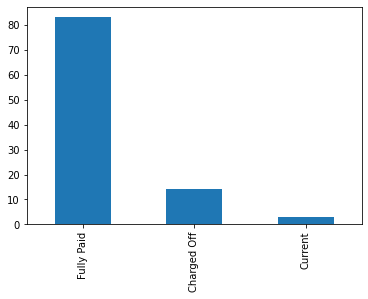

In [29]:
ls.plot.bar()

<AxesSubplot:xlabel='loan_amnt'>

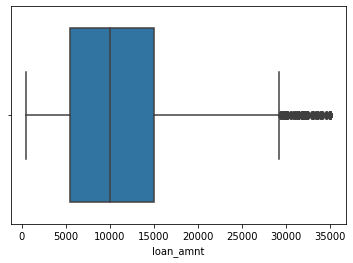

In [30]:
# Box plot on Loan amount
sns.boxplot(loan.loan_amnt)


<AxesSubplot:xlabel='funded_amnt'>

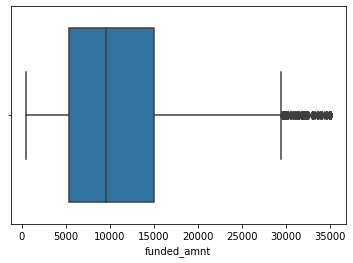

In [31]:
# Box plot on funded amount
sns.boxplot(loan.funded_amnt)

<AxesSubplot:xlabel='funded_amnt_inv'>

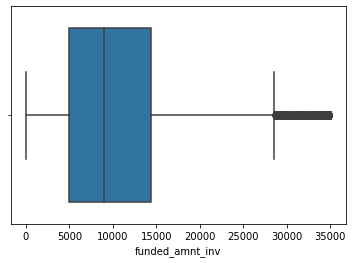

In [32]:
# Box plot on funded amount committed by invester
sns.boxplot(loan.funded_amnt_inv)

<AxesSubplot:xlabel='total_pymnt'>

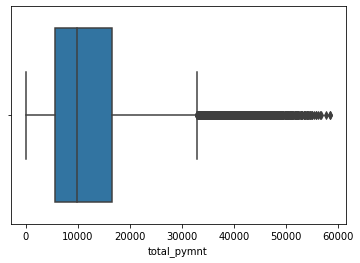

In [33]:
# Box plot on Total payment
sns.boxplot(loan.total_pymnt)

<AxesSubplot:xlabel='annual_inc'>

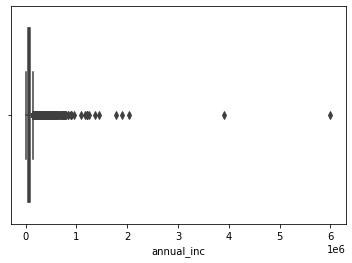

In [34]:
sns.boxplot(loan.annual_inc)

In [35]:
# Finding stats on Annual income
loan.annual_inc.describe()


count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

### Max salary is 6000000.00 and hence removing it from dataset 

<AxesSubplot:xlabel='annual_inc'>

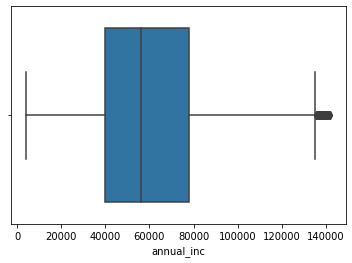

In [36]:
loan1 = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.95)]
sns.boxplot(loan1.annual_inc)

<AxesSubplot:xlabel='annual_inc'>

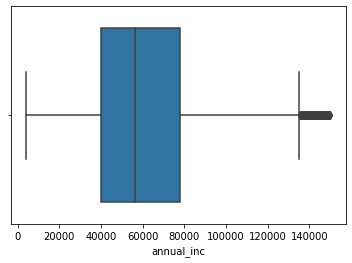

In [37]:
loan1 = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.96)]
sns.boxplot(loan1.annual_inc)

<AxesSubplot:xlabel='annual_inc'>

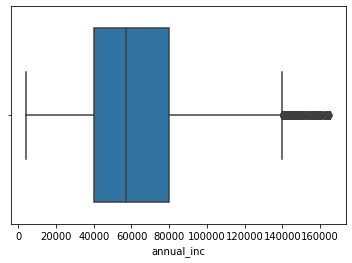

In [38]:
loan1 = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.97)]
sns.boxplot(loan1.annual_inc)

<AxesSubplot:xlabel='annual_inc'>

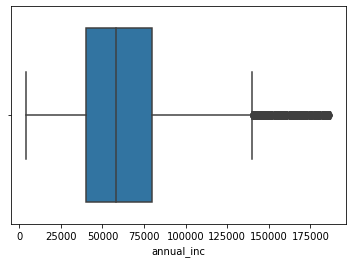

In [39]:
loan1 = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.98)]
sns.boxplot(loan1.annual_inc)

In [40]:
loan1 = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
#sns.boxplot(loan1.annual_inc)

In [41]:
# Removing outlier after 99th quantile 
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]


In [42]:
#Analyzing interest rate
loan['int_rate'].describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

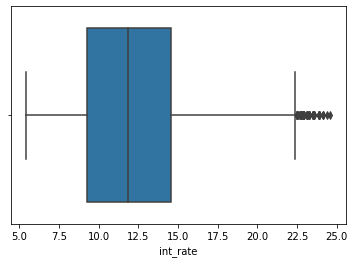

In [43]:
sns.boxplot(loan['int_rate'])

### Interest Rate is high from 75th quantile. i.e., >15%

In [44]:
month_count=[]
month_type=df['term'].unique()
for i in range(0,len(df['term'].unique())):
    month_count.append((df['term']==month_type[i]).sum())

In [45]:
print(month_count)

[29096, 10621]


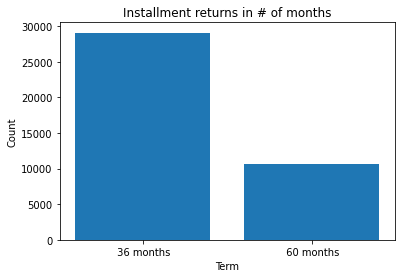

36 months:- 29096 60 months:- 10621


In [46]:
#Installment returns in # of months

plt.bar(month_type,month_count)
plt.title("Installment returns in # of months")
plt.ylabel('Count')
plt.xlabel("Term")
plt.show()
print("36 months:-",month_count[0],"60 months:-",month_count[1])


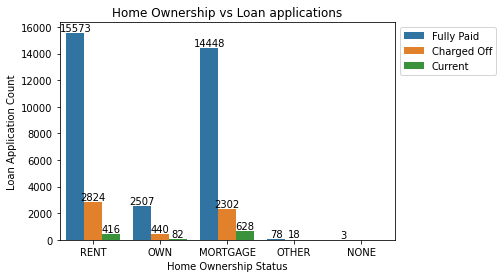

In [47]:
#Home Ownership vs Loan applications
h_o = sns.countplot(x="home_ownership",data=loan, hue='loan_status')
h_o.legend(bbox_to_anchor=(1, 1))
h_o.bar_label(h_o.containers[0])
h_o.bar_label(h_o.containers[1])
h_o.bar_label(h_o.containers[2])
h_o.set_title('Home Ownership vs Loan applications')
h_o.set_xlabel('Home Ownership Status')
h_o.set_ylabel('Loan Application Count')      
plt.show()

### Applications received from rented house has higher charge off
### Applicatants who have mortgaged property has higher charge off

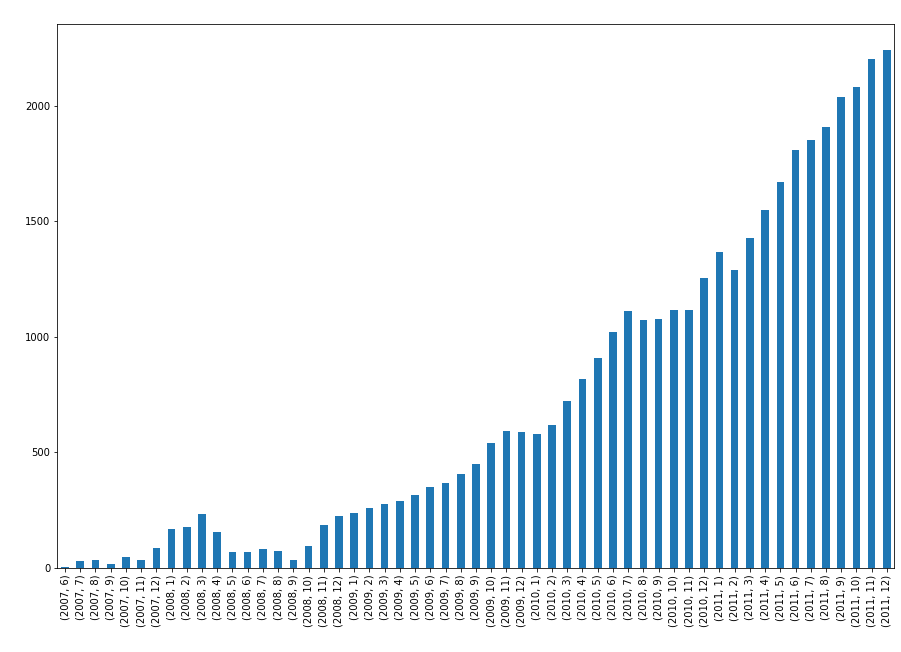

Year 2018-4 to 2018-10 has declining loan applications


In [48]:
# Loan disbursal YoY
plt.figure(figsize=(15,10))
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan application count',fontsize=14, color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("# of loan applications issued YoY", fontsize=14,color='w')
plt.show()

print("Year 2018-4 to 2018-10 has declining loan applications")


In [49]:
lv = loan['verification_status'].value_counts()
lv

Not Verified       16831
Verified           12625
Source Verified     9863
Name: verification_status, dtype: int64

In [50]:
ls = loan['loan_status'].value_counts()
ls

Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64

<AxesSubplot:>

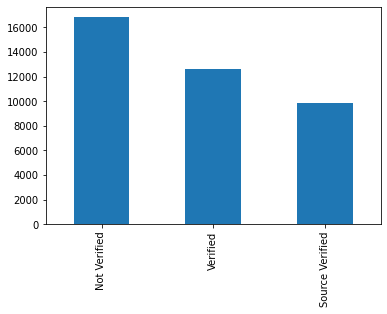

In [51]:
lv.plot.bar()

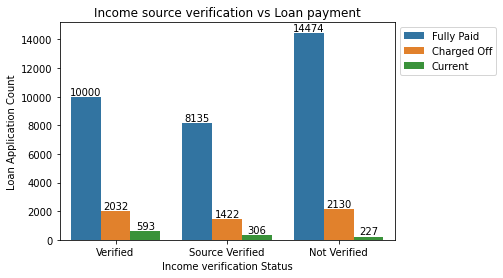

Income source verified and Not verified has high risk of Charge off


In [52]:
#Income verification status vs Loan payment
h_o = sns.countplot(x="verification_status",data=loan, hue='loan_status')
h_o.bar_label(h_o.containers[0])
h_o.bar_label(h_o.containers[1])
h_o.bar_label(h_o.containers[2])
h_o.legend(bbox_to_anchor=(1, 1))
h_o.set_title('Income source verification vs Loan payment')
h_o.set_xlabel('Income verification Status')
h_o.set_ylabel('Loan Application Count')      
plt.show()


print("Income source verified and Not verified has high risk of Charge off")

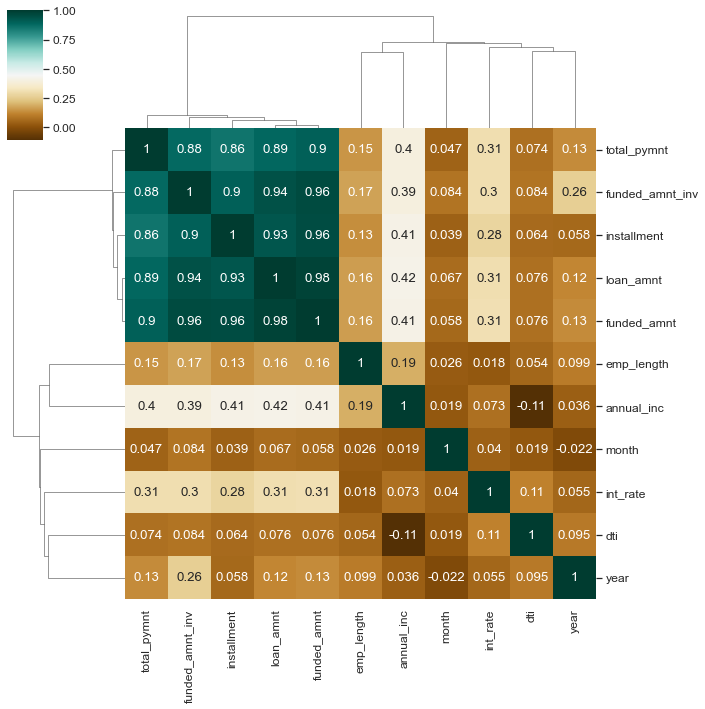

Annual income with dti is negatively correalted.
Positive correlation between annual income and employment years


In [53]:
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(10, 10),cmap="BrBG")
plt.show()



print("Annual income with dti is negatively correalted.")
print("Positive correlation between annual income and employment years")

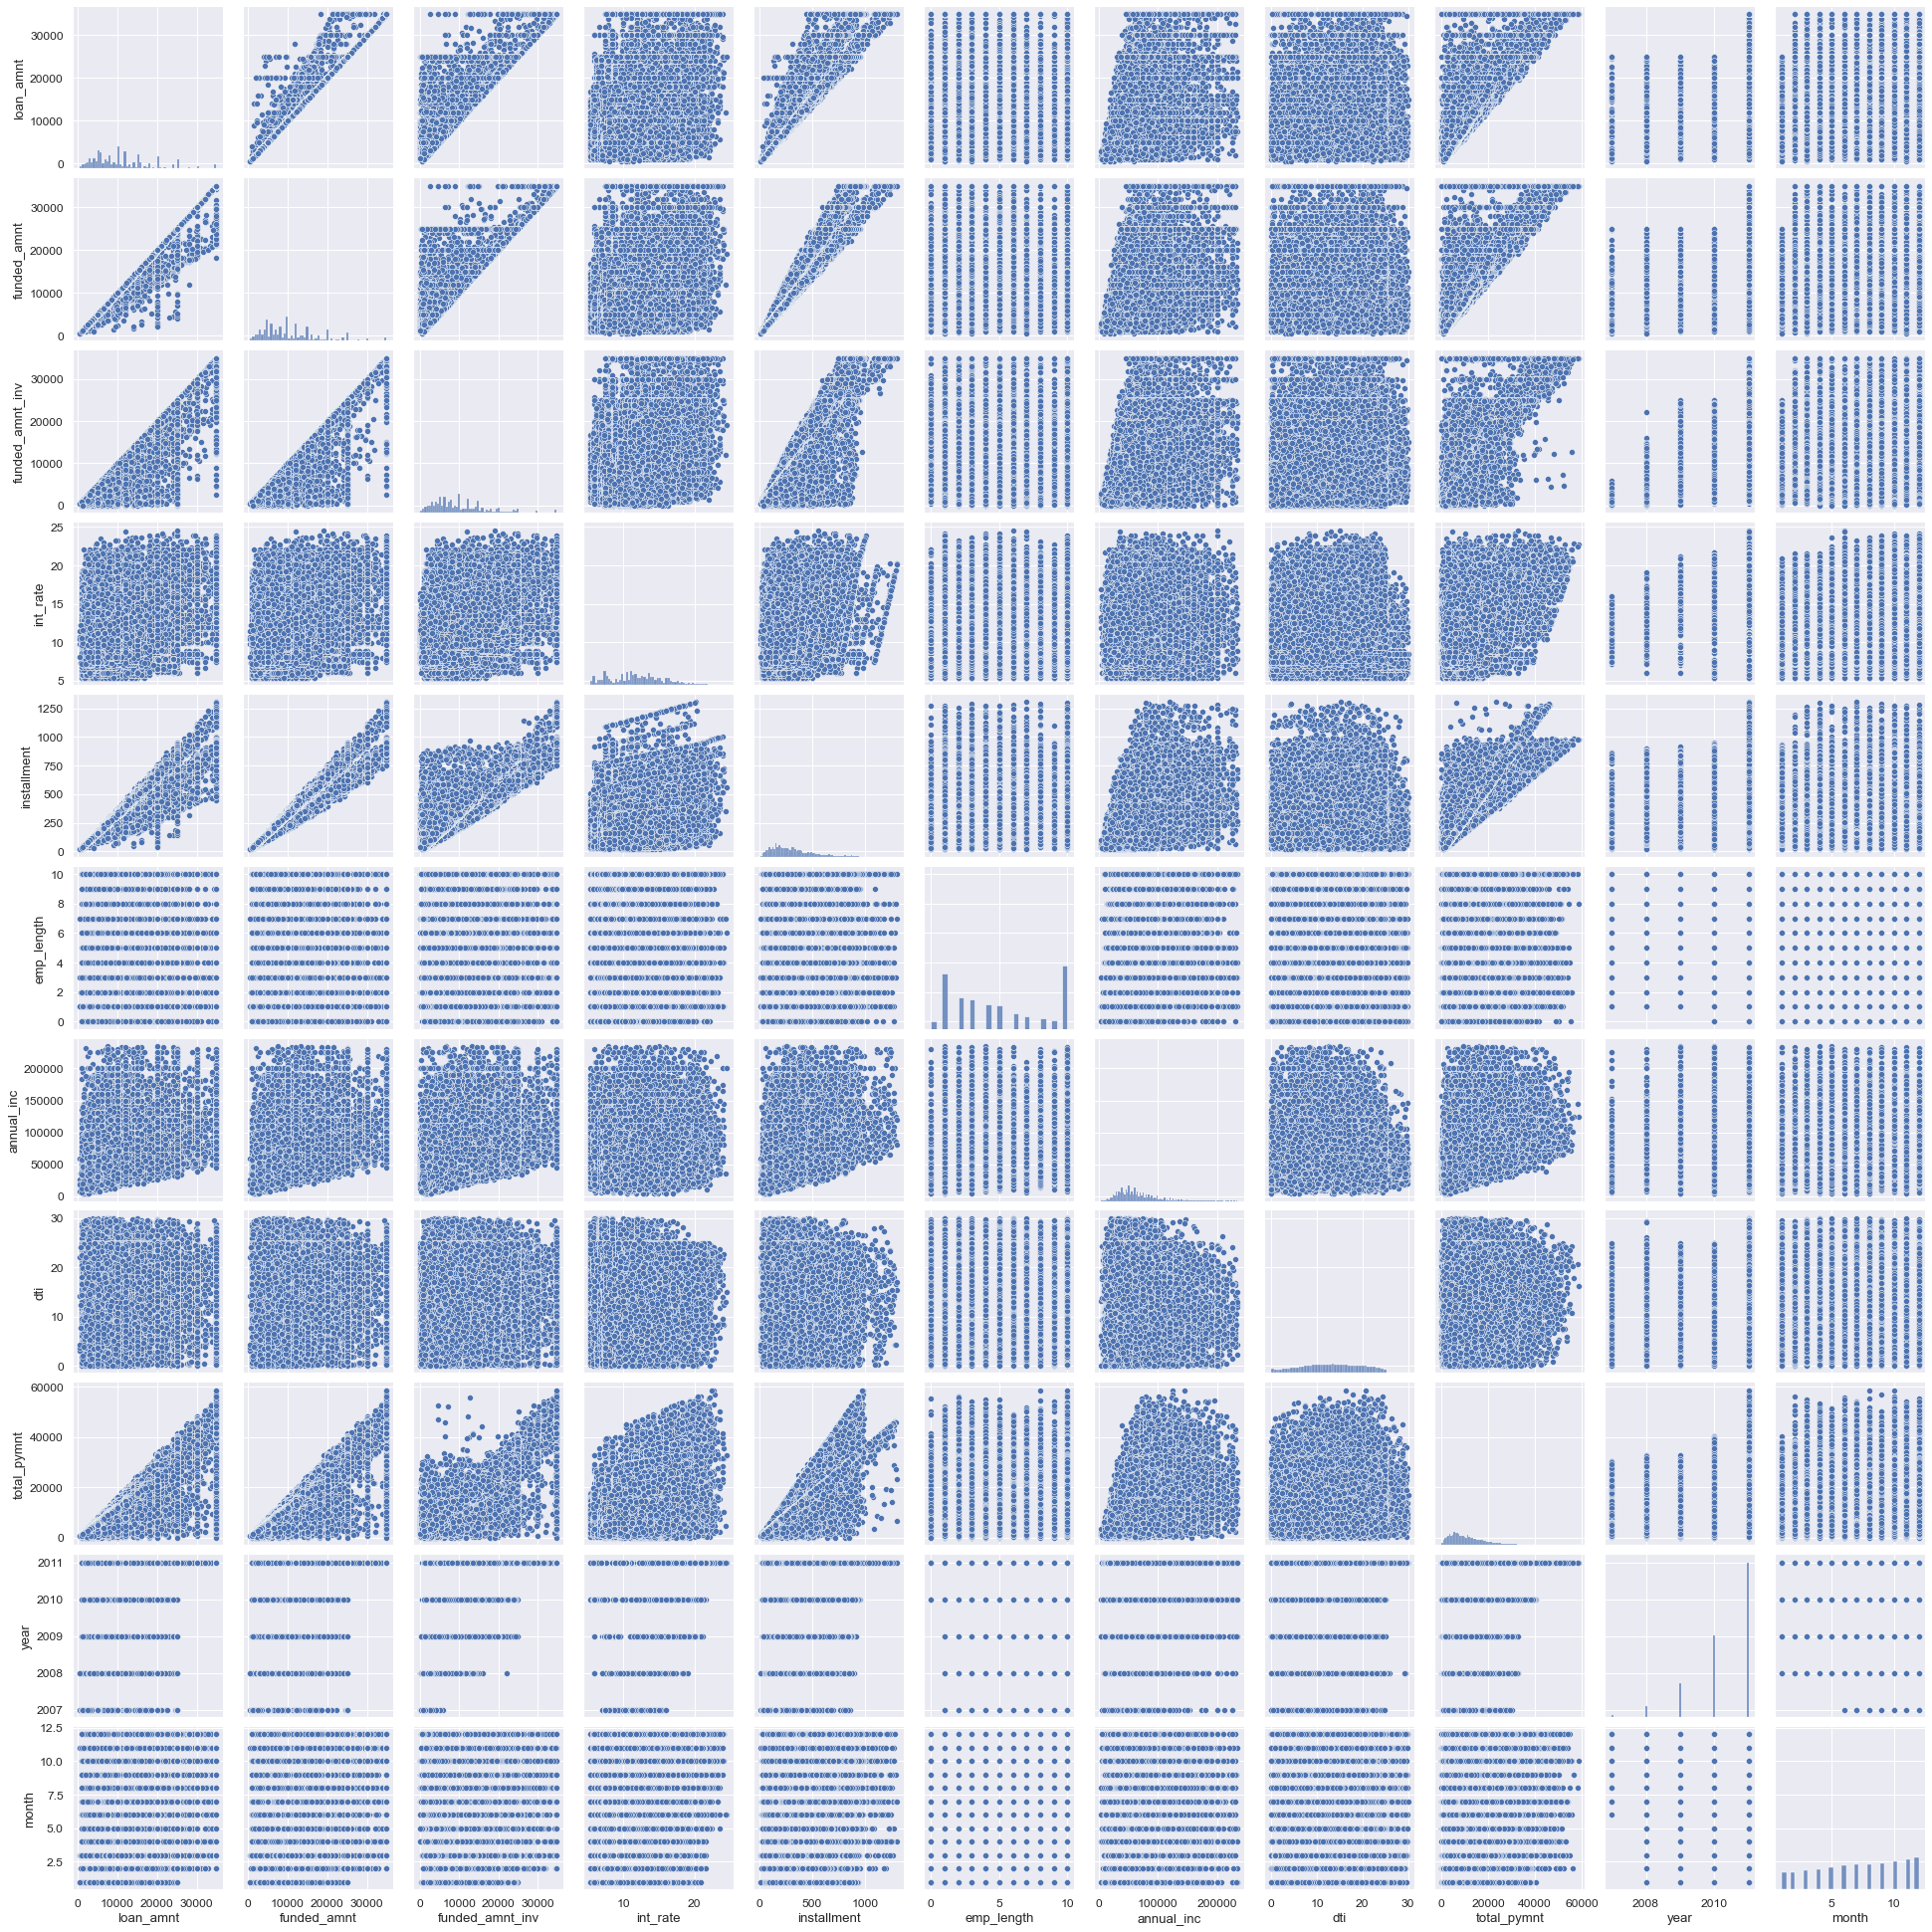

In [54]:
sns.pairplot(loan)

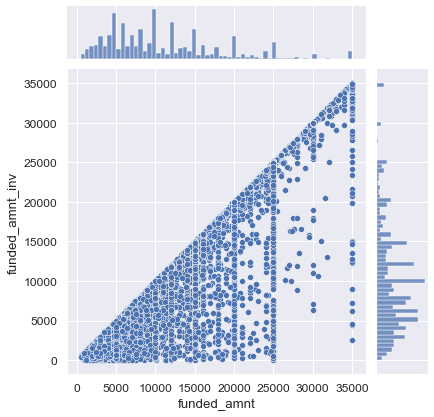

In [55]:
sns.jointplot(loan['funded_amnt'],loan['funded_amnt_inv'])

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

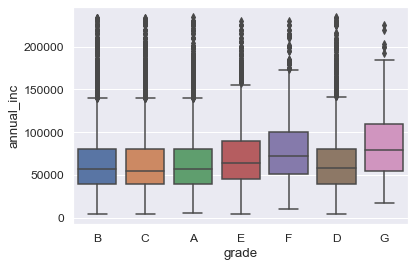

In [56]:
sns.boxplot(loan['grade'],loan['annual_inc'])

In [58]:
# categorise annual incomes into buckets 
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

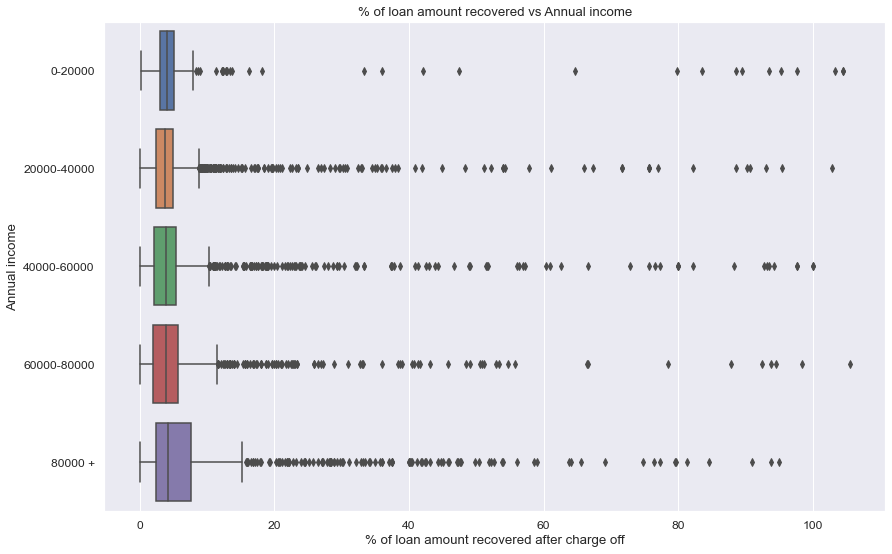

There is slight increase in recovery percentage with increase in annual income


In [69]:
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

plt.figure(figsize=(14,9))
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec)
ax.set_title('% of loan amount recovered vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('% of loan amount recovered after charge off')
plt.show()


print("There is slight increase in recovery percentage with increase in annual income")

In [67]:
inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


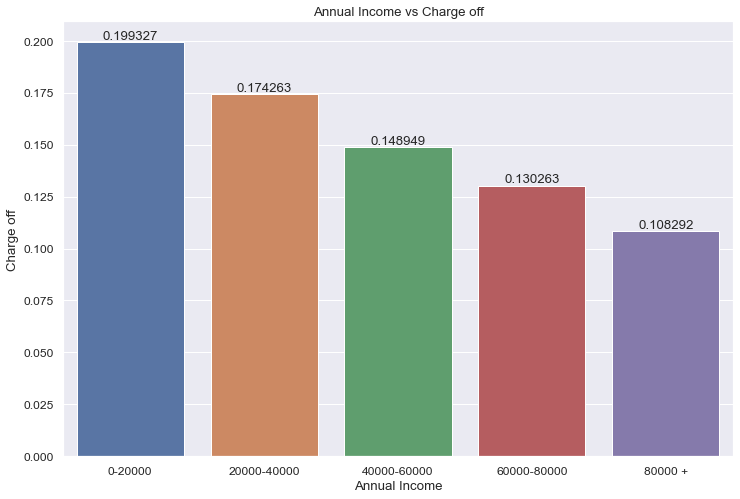

Annual income 0-20000 has higher charge off


In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Annual Income vs Charge off')
ax=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax.bar_label(ax.containers[0])
ax.set_ylabel('Charge off')
ax.set_xlabel('Annual Income')
plt.show()

print("Annual income 0-20000 has higher charge off")